In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "piemonte"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,15.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,1,Piemonte,2,0,2,0,2,-1,-1,...,0.0,0.0,0.0,-1.0,0.00,100.00,-inf,0.00,0.00,-33.33
3,2020-02-28T18:00:00,1,Piemonte,7,0,7,4,11,9,9,...,0.0,71.0,0.0,4.0,0.00,63.64,12.68,0.00,0.00,450.00
4,2020-02-29T17:00:00,1,Piemonte,7,0,7,4,11,0,0,...,0.0,81.0,0.0,0.0,0.00,63.64,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2020-11-25T17:00:00,1,Piemonte,5095,403,5498,72423,77921,846,2878,...,84.0,21540.0,8576.0,868.0,7.33,7.06,13.36,33.56,-0.25,1.10
275,2020-11-26T17:00:00,1,Piemonte,4992,403,5395,73011,78406,485,2751,...,72.0,22418.0,9485.0,588.0,7.47,6.88,12.27,29.00,0.00,0.62
276,2020-11-27T17:00:00,1,Piemonte,4922,395,5317,72272,77589,-817,3149,...,97.0,23141.0,9094.0,-739.0,7.43,6.85,13.61,34.63,-1.99,-1.04
277,2020-11-28T17:00:00,1,Piemonte,4781,384,5165,70912,76077,-1512,2157,...,98.0,18434.0,7886.0,-1360.0,7.43,6.79,11.70,27.35,-2.78,-1.95


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 29, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2021
Nuovi tamponi: 14157.0
Percentuale nuovi positivi/nuovi tamponi: 14.299999999999999 %
Nuovi guariti: 1030.0
Nuovi deceduti: 84.0
Variazione positivi ricoverati con sintomi: -47.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: 953.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 29, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-30T17:00:00,1,Piemonte,196,12,208,2636,2844,112,170,...,1.0,6604.0,3622.0,109.0,5.77,7.31,2.57,4.69,0.00,4.10
1,2020-10-01T17:00:00,1,Piemonte,203,12,215,2692,2907,63,110,...,1.0,5073.0,1270.0,56.0,5.58,7.40,2.17,8.66,0.00,2.22
2,2020-10-02T17:00:00,1,Piemonte,217,13,230,2830,3060,153,219,...,1.0,6549.0,2776.0,138.0,5.65,7.52,3.34,7.89,8.33,5.26
3,2020-10-03T17:00:00,1,Piemonte,214,12,226,3051,3277,217,279,...,0.0,6560.0,3609.0,221.0,5.31,6.90,4.25,7.73,-7.69,7.09
4,2020-10-04T17:00:00,1,Piemonte,216,13,229,3141,3370,93,173,...,1.0,5004.0,3964.0,90.0,5.68,6.80,3.46,4.36,8.33,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-25T17:00:00,1,Piemonte,5095,403,5498,72423,77921,846,2878,...,84.0,21540.0,8576.0,868.0,7.33,7.06,13.36,33.56,-0.25,1.10
57,2020-11-26T17:00:00,1,Piemonte,4992,403,5395,73011,78406,485,2751,...,72.0,22418.0,9485.0,588.0,7.47,6.88,12.27,29.00,0.00,0.62
58,2020-11-27T17:00:00,1,Piemonte,4922,395,5317,72272,77589,-817,3149,...,97.0,23141.0,9094.0,-739.0,7.43,6.85,13.61,34.63,-1.99,-1.04
59,2020-11-28T17:00:00,1,Piemonte,4781,384,5165,70912,76077,-1512,2157,...,98.0,18434.0,7886.0,-1360.0,7.43,6.79,11.70,27.35,-2.78,-1.95


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

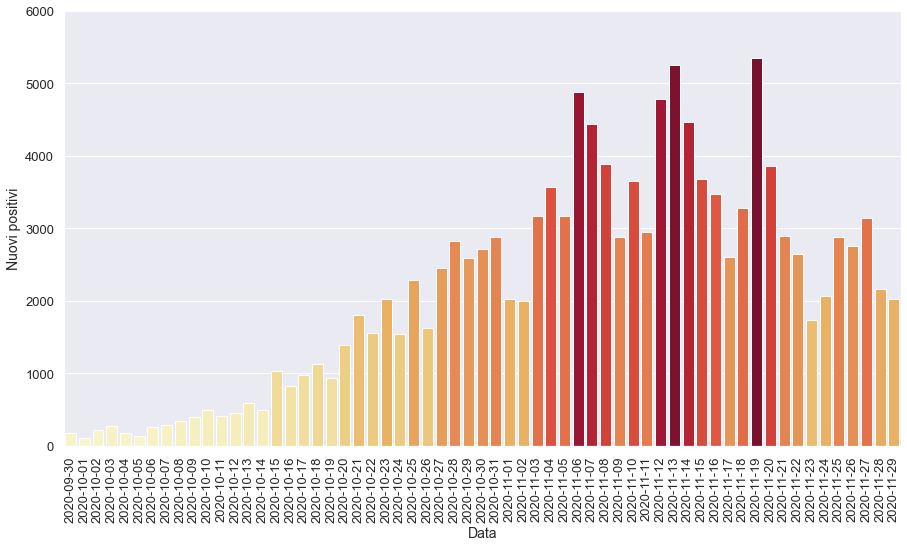

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

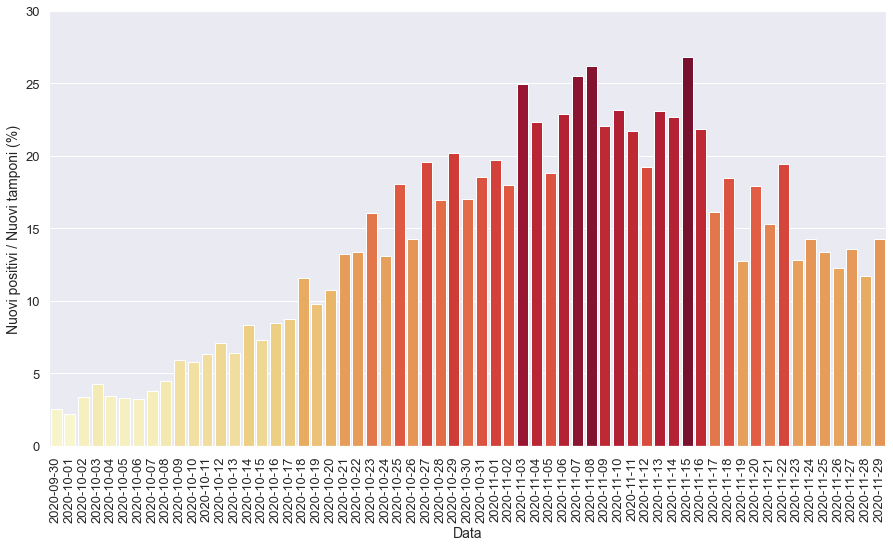

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

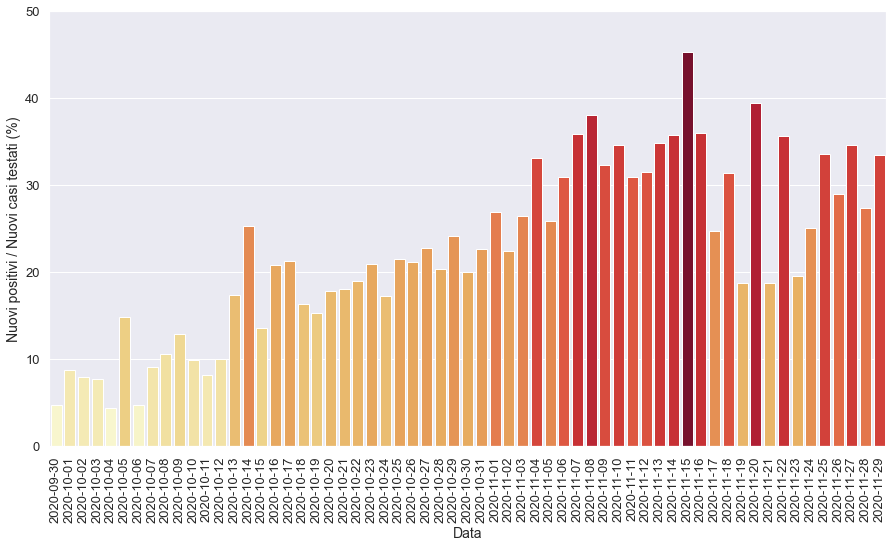

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

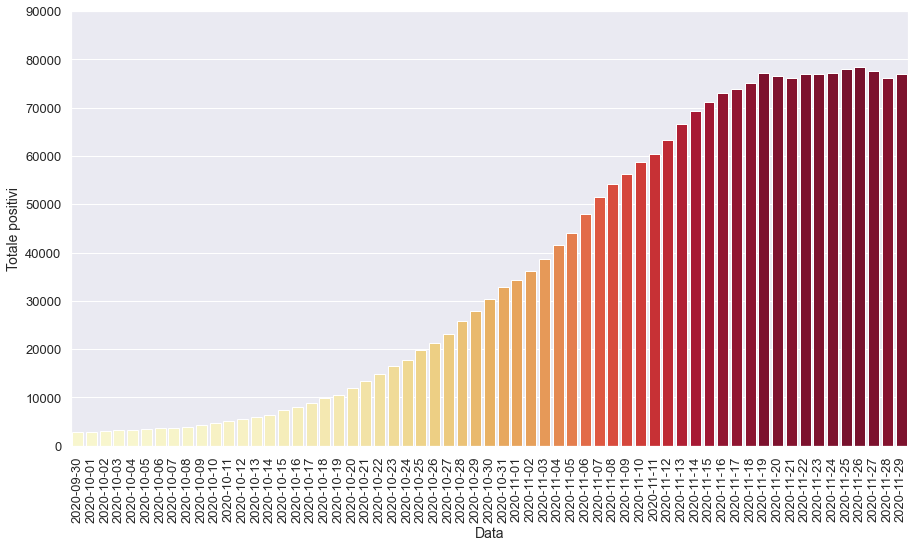

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

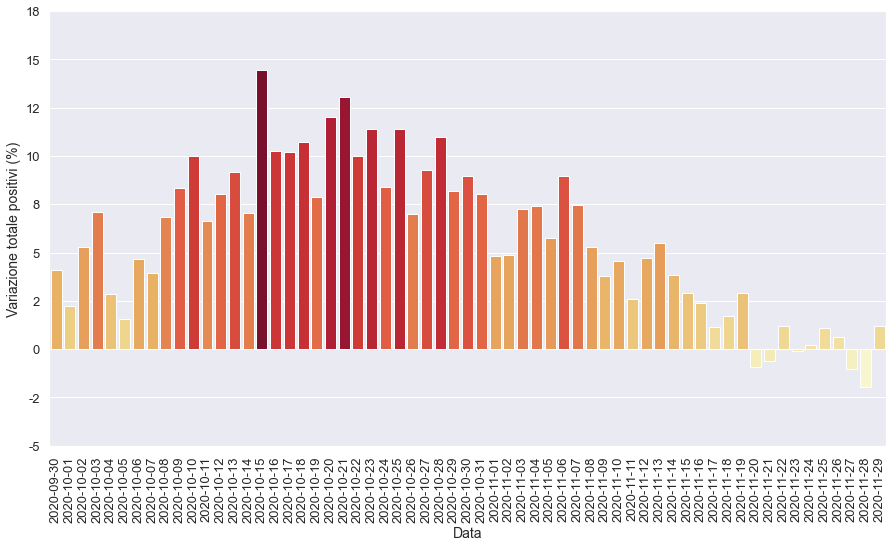

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

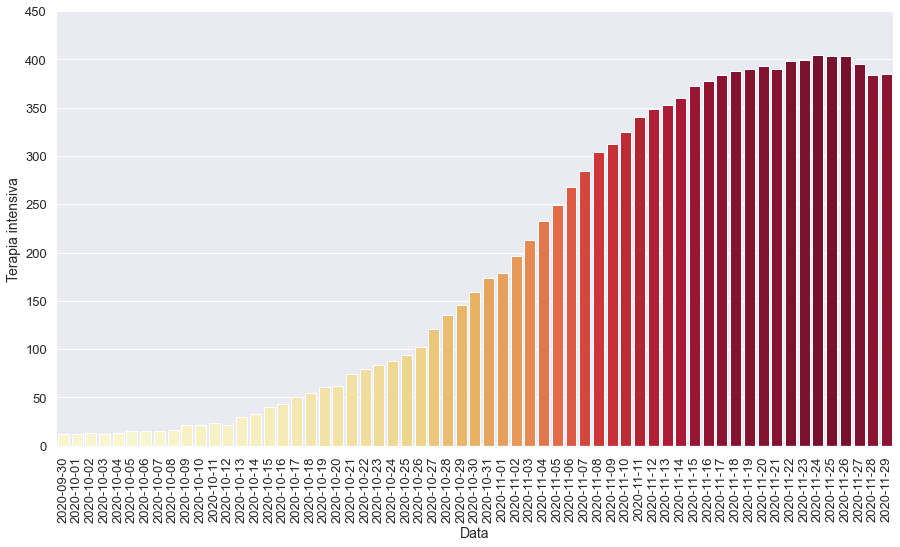

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

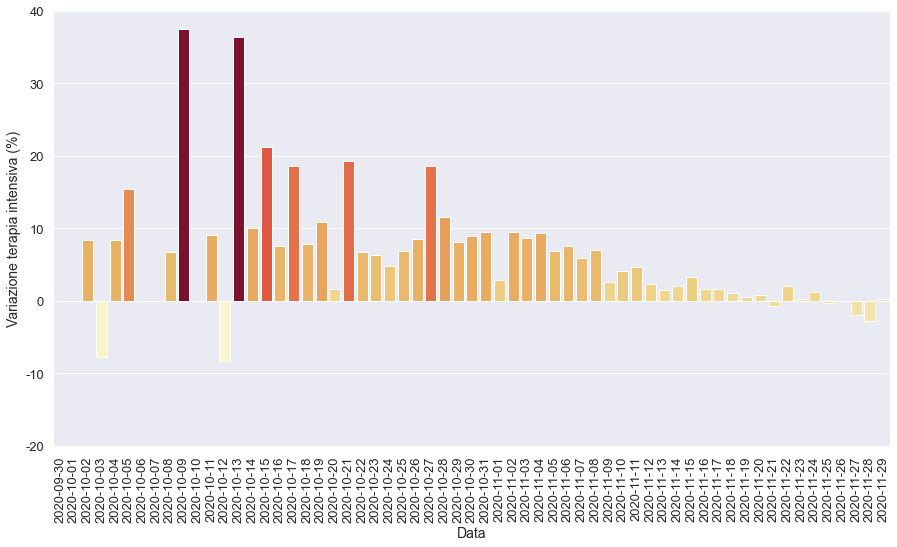

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

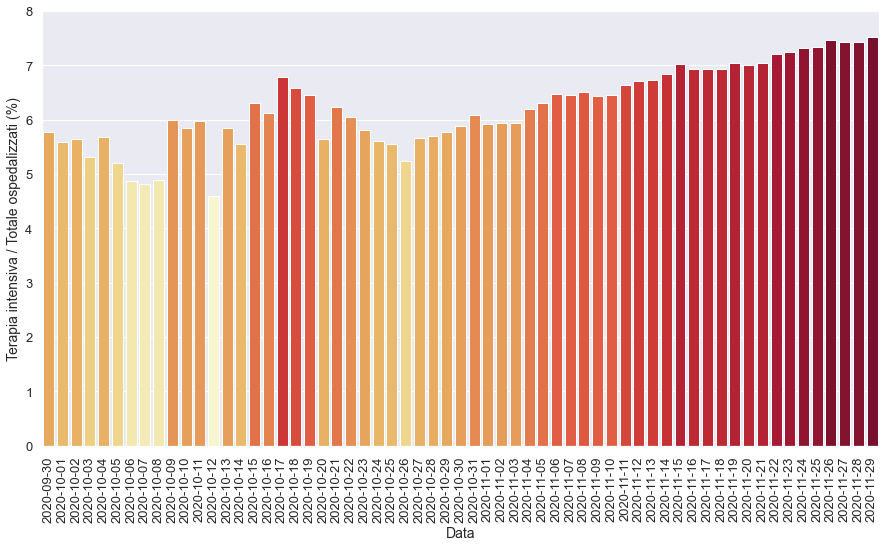

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

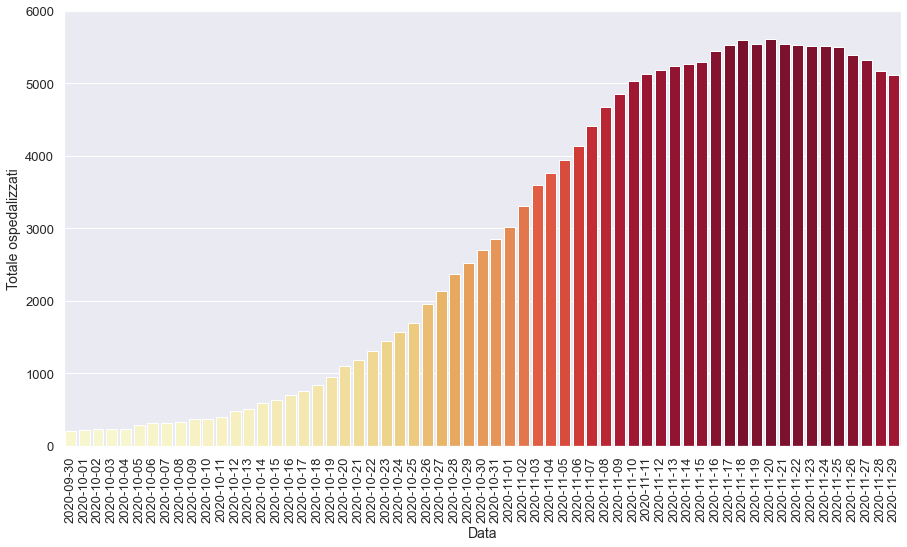

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

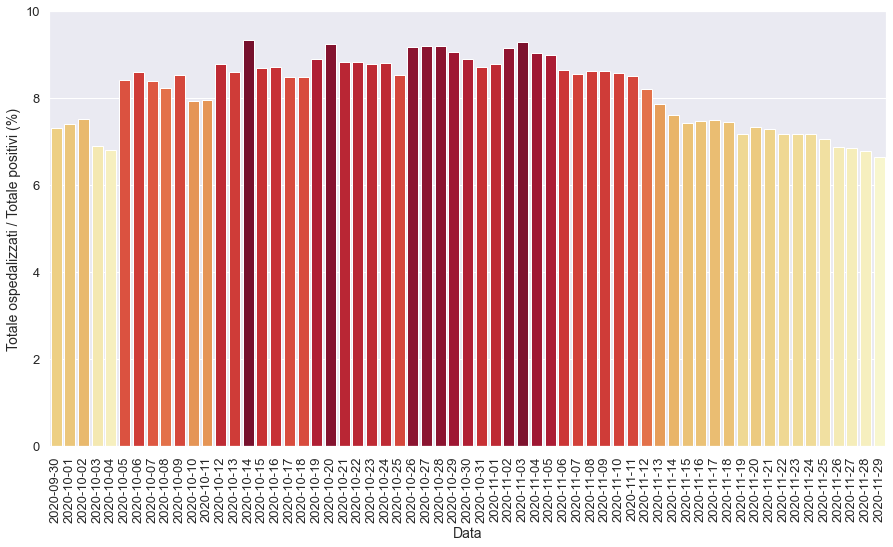

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

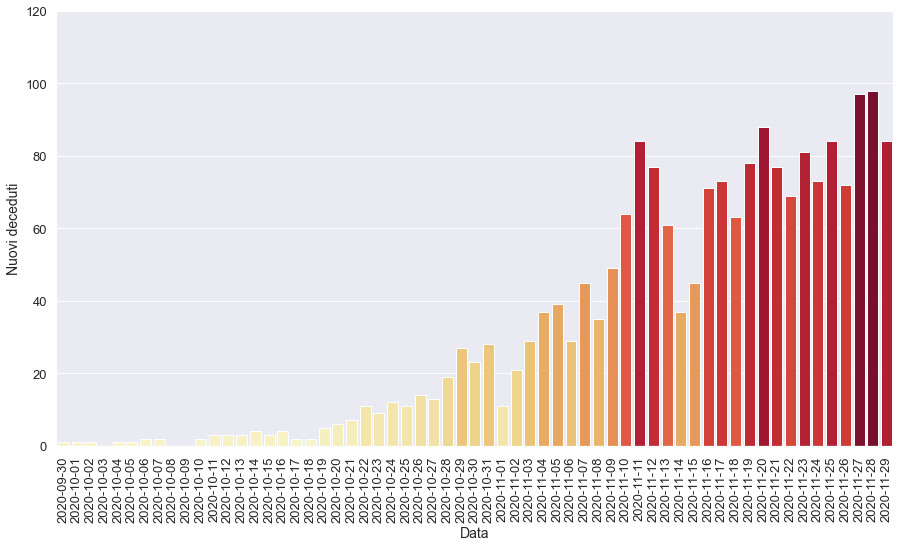

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

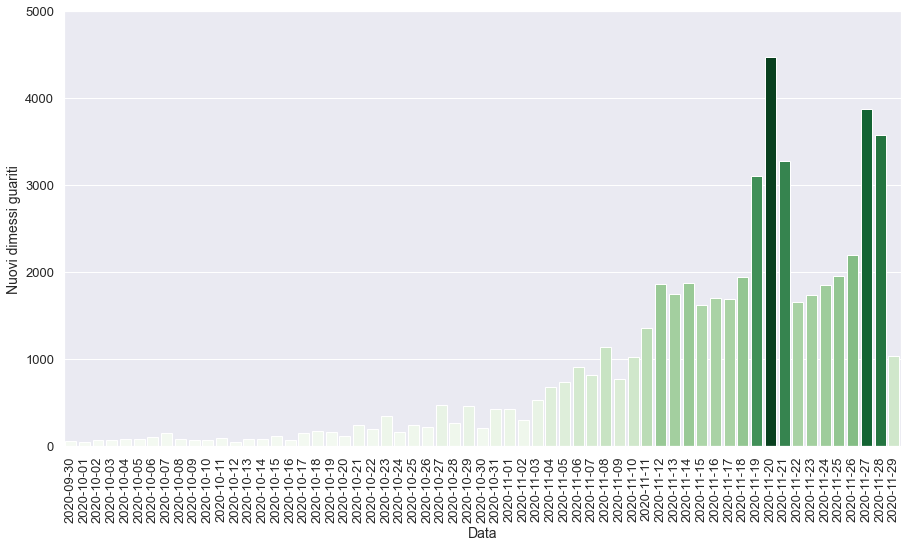

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-30T17:00:00,1,Piemonte,2547,159,2706,27682,30388,2497,2719,...,23.0,15977.0,13604.0,2318.0,5.88,8.90,17.02,19.99,8.90,8.95
1,2020-10-31T17:00:00,1,Piemonte,2683,174,2857,29967,32824,2436,2887,...,28.0,15575.0,12779.0,2285.0,6.09,8.70,18.54,22.59,9.43,8.02
2,2020-11-01T17:00:00,1,Piemonte,2844,179,3023,31391,34414,1590,2024,...,11.0,10249.0,7521.0,1424.0,5.92,8.78,19.75,26.91,2.87,4.84
3,2020-11-02T17:00:00,1,Piemonte,3108,196,3304,32791,36095,1681,2003,...,21.0,11113.0,8933.0,1400.0,5.93,9.15,18.02,22.42,9.50,4.88
4,2020-11-03T17:00:00,1,Piemonte,3379,213,3592,35121,38713,2618,3169,...,29.0,12694.0,11991.0,2330.0,5.93,9.28,24.96,26.43,8.67,7.25
5,2020-11-04T17:00:00,1,Piemonte,3525,233,3758,37819,41577,2864,3577,...,37.0,16022.0,10796.0,2698.0,6.20,9.04,22.33,33.13,9.39,7.40
6,2020-11-05T17:00:00,1,Piemonte,3698,249,3947,40027,43974,2397,3171,...,39.0,16855.0,12277.0,2208.0,6.31,8.98,18.81,25.83,6.87,5.77
7,2020-11-06T17:00:00,1,Piemonte,3871,268,4139,43777,47916,3942,4878,...,29.0,21288.0,15780.0,3750.0,6.47,8.64,22.91,30.91,7.63,8.96
8,2020-11-07T17:00:00,1,Piemonte,4122,284,4406,47083,51489,3573,4437,...,45.0,17390.0,12387.0,3306.0,6.45,8.56,25.51,35.82,5.97,7.46
9,2020-11-08T17:00:00,1,Piemonte,4367,304,4671,49526,54197,2708,3884,...,35.0,14819.0,10206.0,2443.0,6.51,8.62,26.21,38.06,7.04,5.26


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

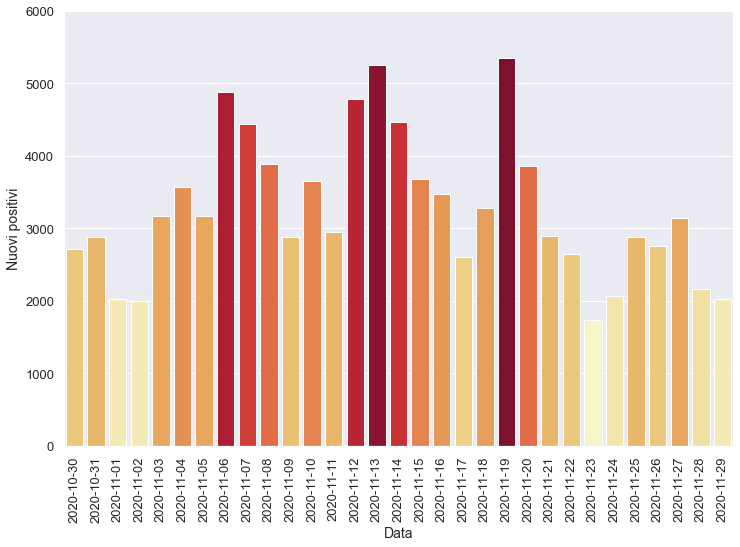

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

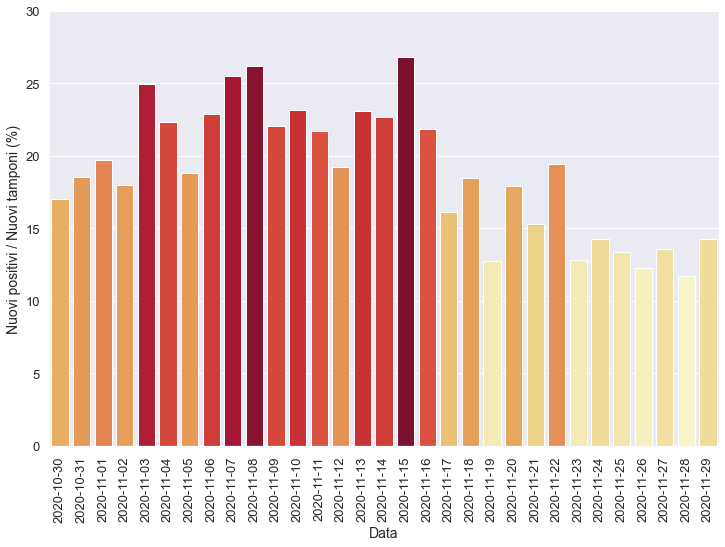

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

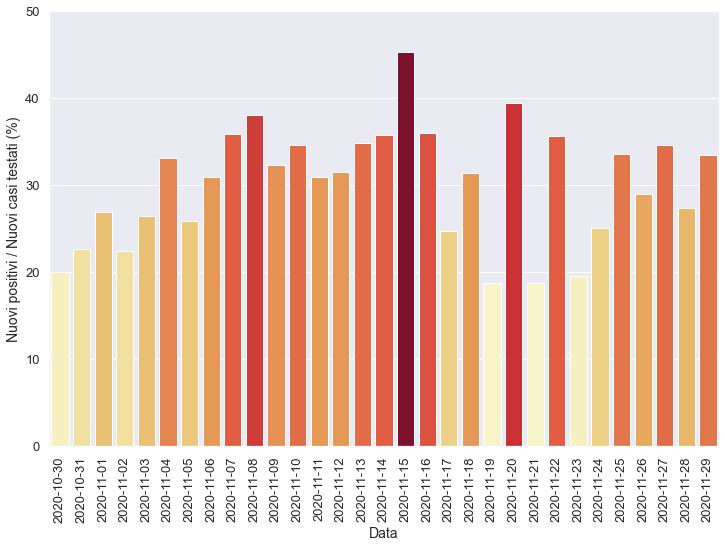

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

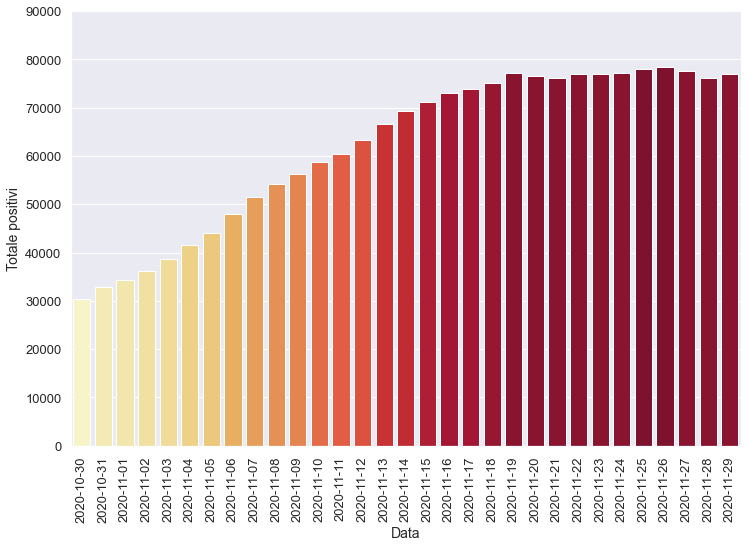

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

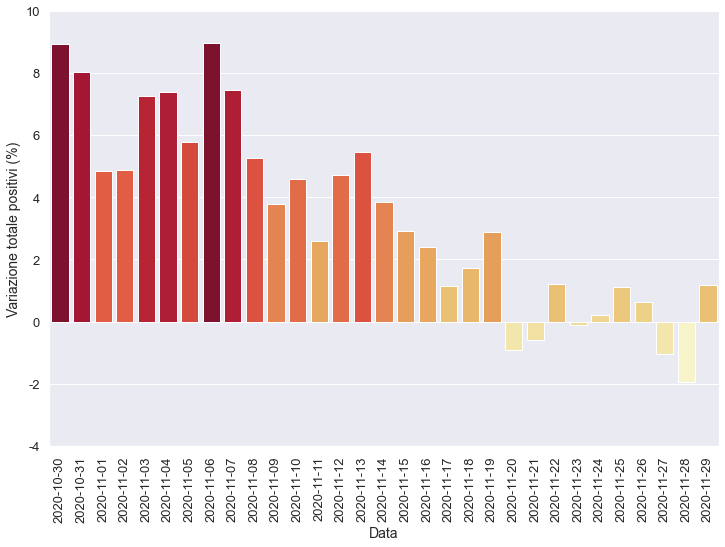

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

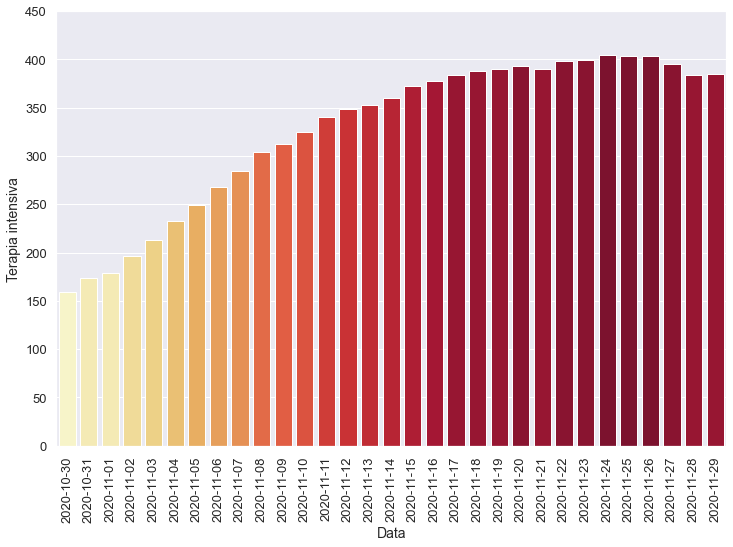

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

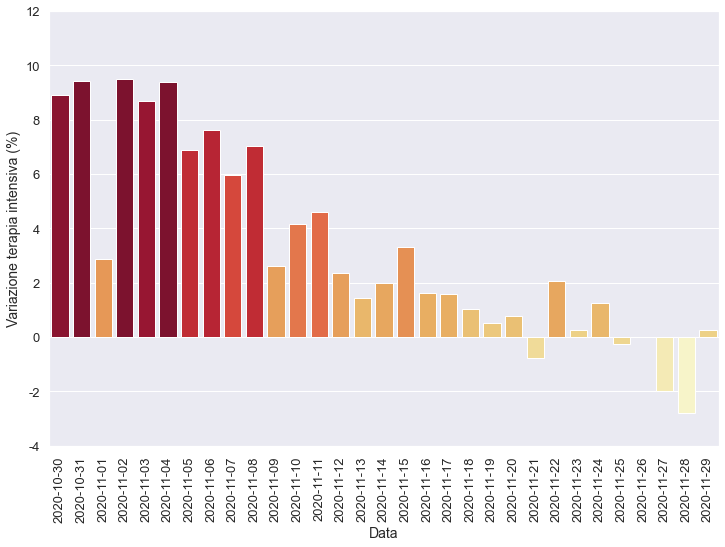

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

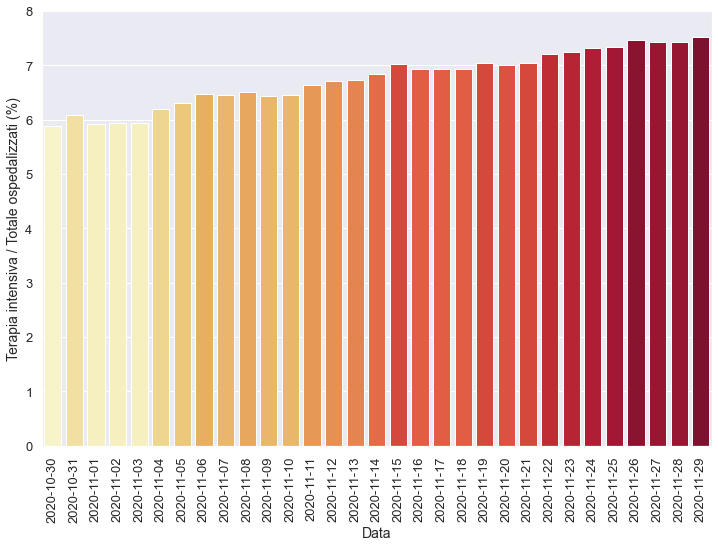

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

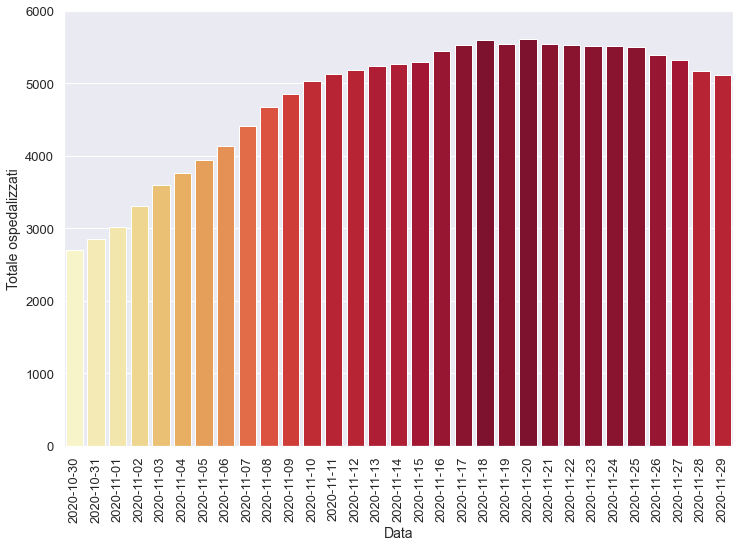

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

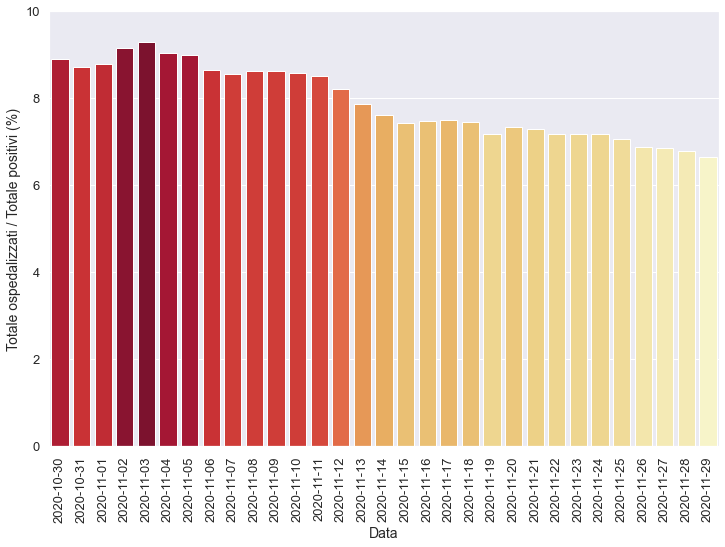

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

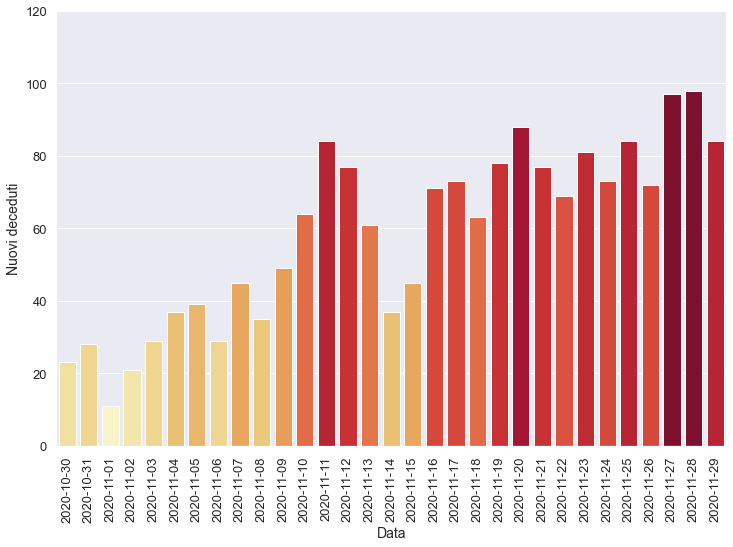

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

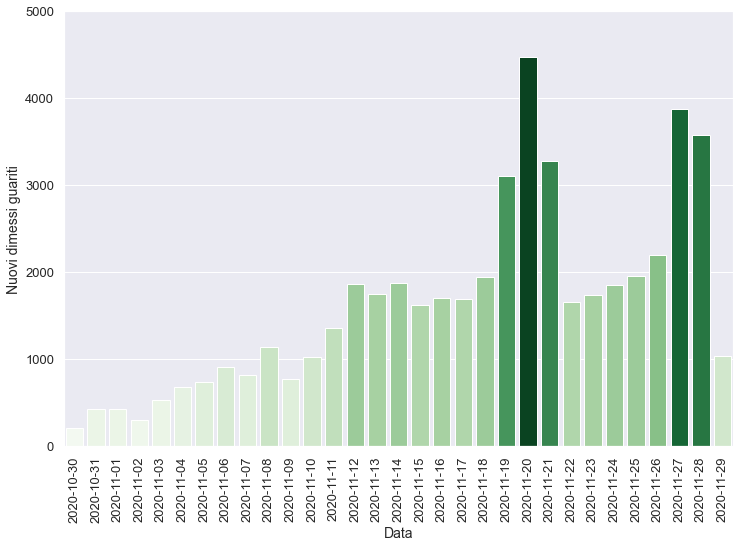

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-22T17:00:00,1,Piemonte,5132,398,5530,71482,77012,920,2641,...,69.0,13605.0,7410.0,930.0,7.20,7.18,19.41,35.64,2.05,1.21
1,2020-11-23T17:00:00,1,Piemonte,5112,399,5511,71412,76923,-89,1730,...,81.0,13529.0,8887.0,-70.0,7.24,7.16,12.79,19.47,0.25,-0.12
2,2020-11-24T17:00:00,1,Piemonte,5116,404,5520,71555,77075,152,2070,...,73.0,14536.0,8282.0,143.0,7.32,7.16,14.24,24.99,1.25,0.20
3,2020-11-25T17:00:00,1,Piemonte,5095,403,5498,72423,77921,846,2878,...,84.0,21540.0,8576.0,868.0,7.33,7.06,13.36,33.56,-0.25,1.10
4,2020-11-26T17:00:00,1,Piemonte,4992,403,5395,73011,78406,485,2751,...,72.0,22418.0,9485.0,588.0,7.47,6.88,12.27,29.00,0.00,0.62
5,2020-11-27T17:00:00,1,Piemonte,4922,395,5317,72272,77589,-817,3149,...,97.0,23141.0,9094.0,-739.0,7.43,6.85,13.61,34.63,-1.99,-1.04
6,2020-11-28T17:00:00,1,Piemonte,4781,384,5165,70912,76077,-1512,2157,...,98.0,18434.0,7886.0,-1360.0,7.43,6.79,11.70,27.35,-2.78,-1.95
7,2020-11-29T17:00:00,1,Piemonte,4734,385,5119,71865,76984,907,2021,...,84.0,14157.0,6038.0,953.0,7.52,6.65,14.28,33.47,0.26,1.19


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

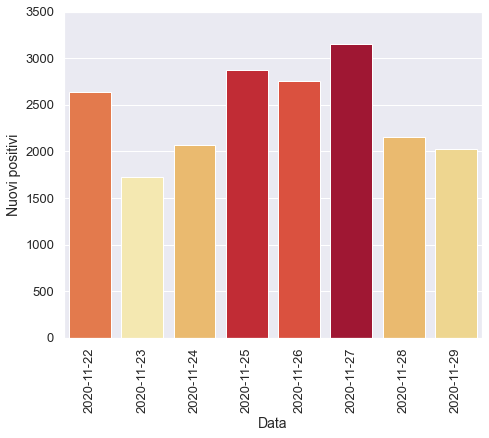

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

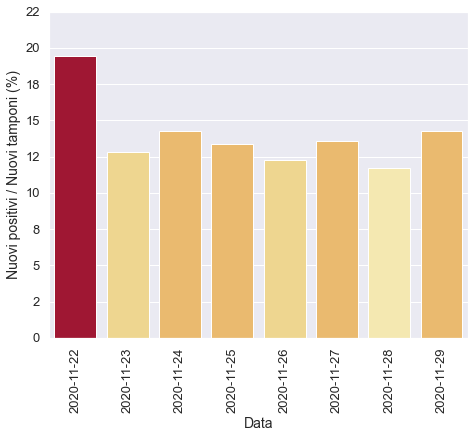

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

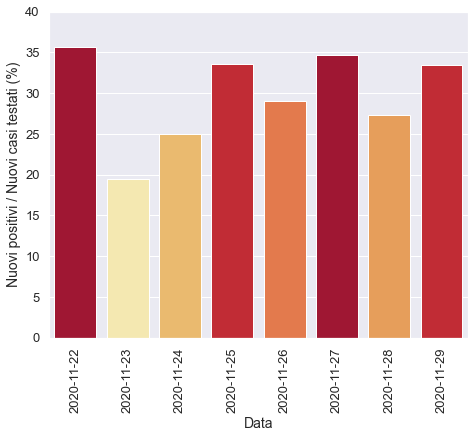

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

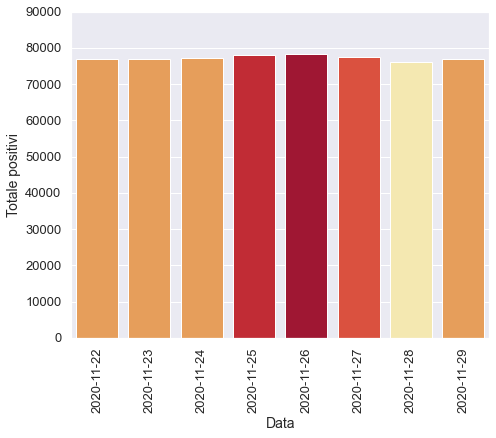

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

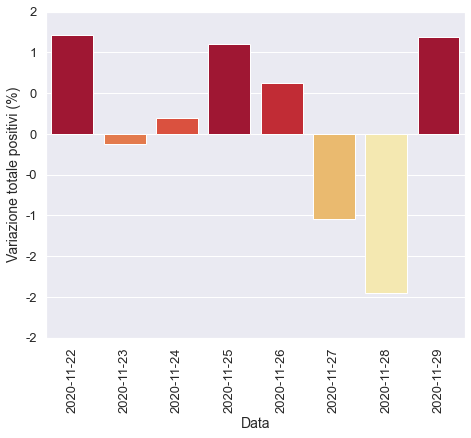

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

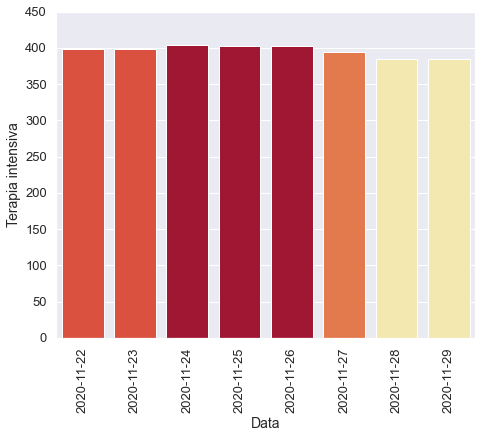

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

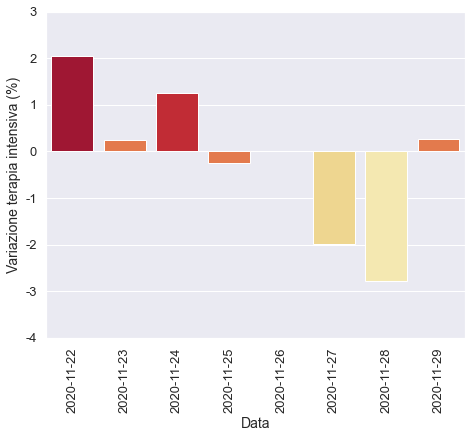

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

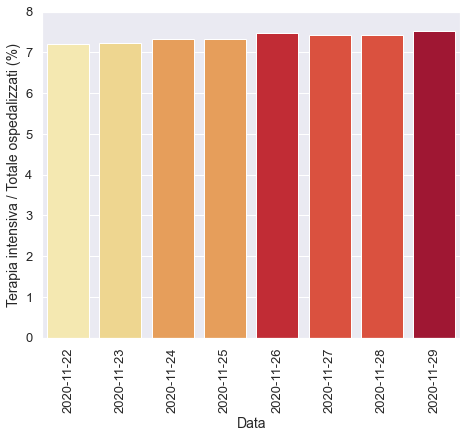

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

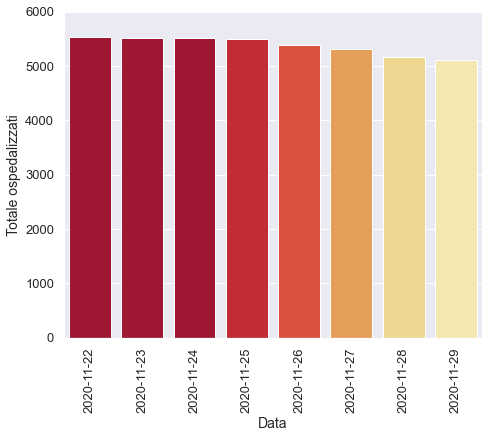

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

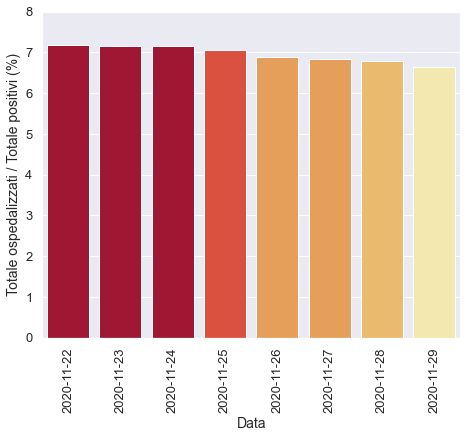

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

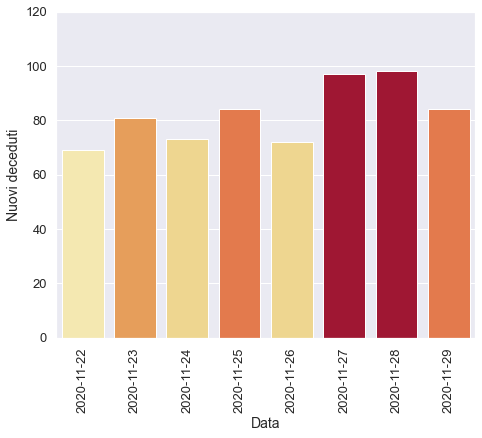

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

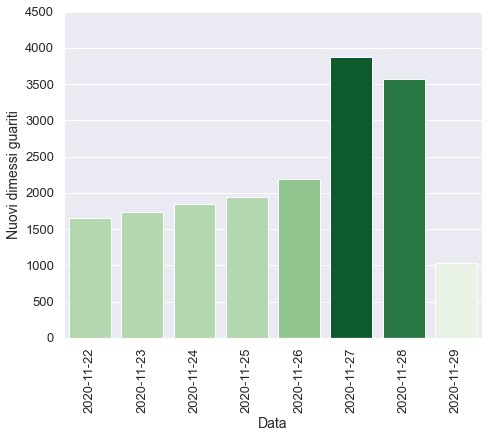

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)